# 분류기(Classifier) 학습

## 데이터 종류에 따른 라이브러리 사용

이미지나 텍스트, 오디오, 비디오 데이터를 다룰 때는 표준 `Python` 패키지를 이용하여 `Numpy` 배열로 불러오면 됩니다.
이후, 배열을 `torch.*Tensor` 로 변환합니다.

* 이미지
    * Pillow, OpenCV, OpenGL 등
* 오디오
    * Scipy, LibROSA 등
* 텍스트
    * Python Lib, Cython, NLTK, SpaCy 등



Pytorch에는 위에 말한 데이터들을 처리하기 위해 `torchvision`, `torchtext`, `torchaudio` 등을 제공합니다.

해당 문서에서 사용할 패키지는 `torchvision`으로 일반적으로 사용하는 데이터셋을 위한 데이터 로더(data loader) `torchvision.datasets` 과 이미지용 데이터 변환기(data.transformer) `torch.utils.data.DataLoader`가 포함되어 있습니다. 이를 보일러 플레이트 코드(bolierplate code)로 사용할 수 있습니다.

해당 문서에서는 Cifar10 데이터셋을 사용합니다.

![](https://tutorials.pytorch.kr/_images/cifar10.png)

# 이미지 분류기 학습

다음과 같은 단계로 진행합니다.

1. `torchvision`을 사용하여 CIFAR10의 학습용/시험용 데이터셋을 불러오고, 정규화(Normalizing) 합니다.
2. 합성곱 신경망(Convolution)을 정의합니다.
3. 손실 함수를 정의합니다.
4. 학습용 데이터를 사용하여 신경망을 학습합니다.
5. 시험용 데이터를 사용

# 학습/테스트 데이터셋 불러오기

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

In [6]:
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)
testset =  torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'car', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
def imshow(img):
    img = img/2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

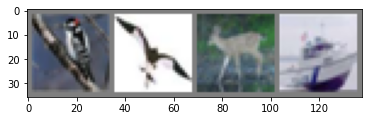

 bird  bird  deer  ship


In [16]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# 합성곱 신경망(Convolution Neural Network)) 정의

In [17]:
import torch.nn as nn
import torch.nn.functional as F

In [23]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)

        return x

net = Net()

# 손실 함수 및 Optimizer 정의

In [24]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

# 신경망 학습

단순히 데이터를 반복해서 신경망에 입력으로 제공하고, 최적화(Optimize)만 하면 됩니다.

In [36]:
for epoch in range(2):
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if(i%2000 == 1999): 
            print('[{0}, {1}] loss: {2}'.format(epoch+1, i+1, running_loss/2000))
            running_loss = 0.0


SyntaxError: unexpected EOF while parsing (<ipython-input-36-8e3c0bedd613>, line 15)